In [347]:
from environment_configuration import *

# Import packages
import pickle
import pandas as pd
from pathlib import Path
import gc

In [638]:
from clean_data_load import *

In [639]:
products_clean.head()

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin
idx,,,,,,,,,,,,,,,,,,,,
0,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...,GPS & Navigation,Vehicle GPS,Trucking GPS,Unknown,Unknown,1,299.99,0,0,5.0,2.400000,0.400000,0.200000,0.200000,0.000000,0.200000,Unknown
47,0594451647,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Computers & Accessories,Touch Screen Tablet Accessories,Chargers & Adapters,Unknown,Unknown,1,49.95,0,0,5.0,4.200000,0.000000,0.200000,0.000000,0.200000,0.600000,Unknown
116,0594481813,Power up your device with this Barnes &amp; No...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,eBook Readers & Accessories,Power Adapters,Unknown,Unknown,Unknown,1,19.65,0,0,8.0,4.000000,0.000000,0.000000,0.375000,0.250000,0.375000,Unknown
261,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,Accessories & Supplies,Audio & Video Accessories,TV Accessories & Parts,TV Ceiling & Wall Mounts,Unknown,1,29.99,1,10,219.0,4.461187,0.027397,0.013699,0.082192,0.223744,0.652968,Unknown
3206,1400532620,Barnes & Noble Nook eReader - no 3GMeet nook. ...,Barnes &amp; Noble Nook eReader - no 3G,eBook Readers & Accessories,Unknown,Unknown,Unknown,Unknown,1,74.95,1,5,41.0,3.609756,0.219512,0.048780,0.048780,0.268293,0.414634,50thPercentile


In [7]:
products_prep = products_clean[['asin', 'hasDescription', 'price_t',
          'containsAnySalesRank','numberQuestions','numberReviews',
          'meanStarRating','star1Rating','star2Rating','star3Rating','star4Rating','star5Rating']]
products_prep.head()

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,0528881469,1,299.99,0,0,5.0,2.400000,0.400000,0.200000,0.200000,0.000000,0.200000
1,0594451647,1,49.95,0,0,5.0,4.200000,0.000000,0.200000,0.000000,0.200000,0.600000
2,0594481813,1,19.65,0,0,8.0,4.000000,0.000000,0.000000,0.375000,0.250000,0.375000
3,0972683275,1,29.99,1,10,219.0,4.461187,0.027397,0.013699,0.082192,0.223744,0.652968
4,1400532620,1,74.95,1,5,41.0,3.609756,0.219512,0.048780,0.048780,0.268293,0.414634


In [8]:
from data_load import *

Script: 02.00.02 [Import Packages] completed
Script: 02.01.01 [Load Reviews Data] completed
Script: 02.01.02 [Verify Data Load] skipped
Script: 02.01.03 [Load Product Metadata Data] completed
Script: 02.01.04 [Verify Reviews Data] skipped
Script: 02.01.05 [Load QA Data] completed
Script: 02.01.05 [Verify QA Data] skipped


In [37]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [38]:
reviews_prep = reviews_df[['reviewerID','asin','helpful','overall','unixReviewTime']]

In [39]:
reviews_prep

,reviewerID,asin,helpful,overall,unixReviewTime
0,AO94DHGC771SJ,0528881469,"[0, 0]",5.0,1370131200
1,AMO214LNFCEI4,0528881469,"[12, 15]",1.0,1290643200
2,A3N7T0DY83Y4IG,0528881469,"[43, 45]",3.0,1283990400
3,A1H8PY3QHMQQA0,0528881469,"[9, 10]",2.0,1290556800
4,A24EV6RXELQZ63,0528881469,"[0, 0]",1.0,1317254400
...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"[1, 1]",5.0,1405555200
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"[0, 0]",5.0,1405382400
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,"[0, 0]",5.0,1405555200
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,"[0, 0]",5.0,1405641600


In [40]:
#create help metric variables
reviews_prep.loc[:,'help_ratio']=reviews_prep['helpful'].apply(lambda x: (x[0]+1)/(x[1]+1))
reviews_prep.loc[:,'help_count']=reviews_prep['helpful'].apply(lambda x: x[0]+x[1])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
#zero out ratios with no counts due to +1 above
reviews_prep.loc[reviews_prep.help_count==0,'help_ratio'] = 0.0

### Compare dataframe to create user/product matrix

In [42]:
#number of total reviews
reviews_prep.asin.nunique()

63001

In [43]:
products_prep.asin.unique()

array(['0528881469', '0594451647', '0594481813', ..., 'B00L21HC7A',
       'B00L3YHF6O', 'B00LGQ6HL8'], dtype=object)

##### 11 different

In [44]:
merged = pd.merge(reviews_prep, products_prep, how='inner', on='asin')

In [45]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688775 entries, 0 to 1688774
Data columns (total 18 columns):
reviewerID              1688775 non-null object
asin                    1688775 non-null object
helpful                 1688775 non-null object
overall                 1688775 non-null float64
unixReviewTime          1688775 non-null int64
help_ratio              1688775 non-null float64
help_count              1688775 non-null int64
hasDescription          1688775 non-null int32
price_t                 1688775 non-null float64
containsAnySalesRank    1688775 non-null int32
numberQuestions         1688775 non-null int32
numberReviews           1688775 non-null float64
meanStarRating          1688775 non-null float64
star1Rating             1688775 non-null float64
star2Rating             1688775 non-null float64
star3Rating             1688775 non-null float64
star4Rating             1688775 non-null float64
star5Rating             1688775 non-null float64
dtypes: float64(10

In [46]:
merged.drop(['helpful'], axis=1, inplace=True)

In [47]:
#missing products
merged[merged.hasDescription.isna() == True]['asin'].unique()

array([], dtype=object)

In [48]:
products_prep[products_prep.asin.isin(merged[merged.hasDescription.isna() == True]['asin'].unique())]

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating


In [49]:
#check partial
products_prep[products_prep.asin.astype(str).str.contains('JD3')]

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
123,B00000JD34,1,22.49,1,10,21.0,3.952381,0.047619,0.095238,0.095238,0.380952,0.380952
124,B00000JD3C,1,11.30,1,0,6.0,4.000000,0.166667,0.000000,0.000000,0.333333,0.500000
8379,B000EUJD3Q,1,295.00,1,0,11.0,3.818182,0.090909,0.000000,0.181818,0.454545,0.272727
8381,B000EUJD3G,1,250.00,1,0,11.0,3.818182,0.000000,0.090909,0.272727,0.363636,0.272727
19019,B001JD3R7U,1,26.99,0,6,38.0,4.342105,0.026316,0.000000,0.105263,0.342105,0.526316
28926,B003DQJD3S,1,17.90,1,0,8.0,4.000000,0.000000,0.250000,0.000000,0.250000,0.500000
40225,B0054JD3DS,1,2.99,0,0,6.0,4.166667,0.166667,0.000000,0.000000,0.166667,0.666667
45457,B006JD3F0Y,0,8.99,0,0,88.0,4.636364,0.000000,0.022727,0.068182,0.159091,0.750000
62618,B00IJD3QTC,1,269.99,0,10,18.0,4.666667,0.055556,0.000000,0.000000,0.111111,0.833333


In [50]:
merged.head()

,reviewerID,asin,overall,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,AO94DHGC771SJ,0528881469,5.0,1370131200,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
1,AMO214LNFCEI4,0528881469,1.0,1290643200,0.812500,27,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
2,A3N7T0DY83Y4IG,0528881469,3.0,1283990400,0.956522,88,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
3,A1H8PY3QHMQQA0,0528881469,2.0,1290556800,0.909091,19,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
4,A24EV6RXELQZ63,0528881469,1.0,1317254400,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2


In [51]:
merged.iloc[:,3:]

,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,1370131200,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
1,1290643200,0.812500,27,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
2,1283990400,0.956522,88,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
3,1290556800,0.909091,19,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
4,1317254400,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,1405555200,1.000000,2,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688771,1405382400,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688772,1405555200,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688773,1405641600,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0


In [52]:
with open(Path(working_directory + data_path + '/reviews_meta_combined_aggregated.pkl'), 'rb') as pickle_file:
    rev_meta_agg_df = pickle.load(pickle_file)
    rev_meta_agg_df = pd.DataFrame(rev_meta_agg_df)

In [358]:
rev_meta_agg_df.head()

,reviewerID,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,A000715434M800HLCENK9,5.0,1.0,5.0,3.200000,3.0,16.0,95.18,11.99,46.110000,25.99,230.55,1,1,0.0,0.0,0.000000,0.0,0.0
1,A00101847G3FJTWYGNQA,5.0,4.0,6.0,4.666667,5.0,28.0,109.98,8.99,51.293333,42.96,307.76,2,3,52.0,0.0,12.000000,0.0,72.0
2,A00166281YWM98A3SVD55,5.0,4.0,5.0,4.800000,5.0,24.0,199.00,9.83,95.150000,99.98,475.75,6,6,51.0,0.0,10.200000,0.0,51.0
3,A0046696382DWIPVIWO0K,5.0,1.0,5.0,4.200000,5.0,21.0,117.99,17.00,56.696000,17.99,283.48,2,3,321.0,0.0,72.000000,0.0,360.0
4,A00472881KT6WR48K907X,5.0,4.0,7.0,4.571429,5.0,32.0,599.00,7.92,139.935714,42.04,979.55,4,4,331.0,0.0,71.142857,0.0,498.0


with open(Path(working_directory + data_path + '/reviews_meta_combined_individual.pkl'), 'rb') as pickle_file:
    rev_meta_idv_df = pickle.load(pickle_file)
    rev_meta_idv_df = pd.DataFrame(rev_meta_idv_df)

rev_meta_idv_df.head()

del rev_meta_idv_df

In [250]:
merged_2 = pd.merge(merged, rev_meta_agg_df, how='inner', on='reviewerID')

In [251]:
merged_2.iloc[:,3:]

,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,...,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,1370131200,0.0,0,1,299.99,0,0,5.0,2.400000,0.400000,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
1,1366156800,0.0,0,1,27.95,1,10,450.0,4.515556,0.040000,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
2,1375920000,0.0,0,0,16.32,1,0,6.0,3.500000,0.333333,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
3,1366156800,0.0,0,1,37.95,1,10,699.0,4.643777,0.027182,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
4,1375920000,1.0,2,1,125.00,1,10,184.0,4.228261,0.043478,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,1400716800,0.0,0,1,24.95,0,10,23.0,4.869565,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688771,1400630400,0.0,0,1,9.95,1,0,42.0,4.857143,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688772,1403395200,0.0,0,1,12.99,1,0,10.0,5.000000,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688773,1403740800,0.0,0,1,13.99,0,0,16.0,5.000000,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0


In [265]:
merged_2 = merged_2[merged_2.columns[~merged_2.columns.isin(['hasDescription','containsAnySalesRank'])]]

In [267]:
u_uniq = merged_2.reviewerID.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
merged_2['userIdx'] = merged_2.reviewerID.apply(lambda x: user2idx[x])

p_uniq = merged_2.asin.unique()
prod2idx = {o:i for i,o in enumerate(p_uniq)}
merged_2['prodIdx'] = merged_2.asin.apply(lambda x: prod2idx[x])

In [273]:
merged_2

,reviewerID,asin,overall,unixReviewTime,help_ratio,help_count,price_t,numberQuestions,numberReviews,meanStarRating,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,AO94DHGC771SJ,0528881469,5.0,1370131200,0.0,0,299.99,0,5.0,2.400000,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,0
1,AO94DHGC771SJ,B0013G8PTS,5.0,1366156800,0.0,0,27.95,10,450.0,4.515556,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,1
2,AO94DHGC771SJ,B001TQSFXS,5.0,1375920000,0.0,0,16.32,0,6.0,3.500000,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,2
3,AO94DHGC771SJ,B003ZBZ64Q,5.0,1366156800,0.0,0,37.95,10,699.0,4.643777,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,3
4,AO94DHGC771SJ,B0075SUHKI,5.0,1375920000,1.0,2,125.00,10,184.0,4.228261,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,A1FQ3HRVXA4A5B,B00FZ5J8IA,5.0,1400716800,0.0,0,24.95,10,23.0,4.869565,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,57680
1688771,A1FQ3HRVXA4A5B,B00GMRCAC6,5.0,1400630400,0.0,0,9.95,0,42.0,4.857143,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,15878
1688772,A1FQ3HRVXA4A5B,B00IFEERU2,5.0,1403395200,0.0,0,12.99,0,10.0,5.000000,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,62269
1688773,A1FQ3HRVXA4A5B,B00KC7I2GU,5.0,1403740800,0.0,0,13.99,0,16.0,5.000000,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,57683


In [270]:
user2idx_df = pd.DataFrame.from_dict(user2idx, orient='index', columns=['idx'])
prod2idx_df = pd.DataFrame.from_dict(prod2idx, orient='index', columns=['idx'])

In [271]:
user2idx_df.to_pickle("../data/user2idx_20191106.pkl")
prod2idx_df.to_pickle("../data/prod2idx_20191106.pkl")

In [272]:
len(u_uniq), len(p_uniq)

(192403, 62990)

In [61]:
user2idx_df.idx.describe()

count    192403.000000
mean      96201.000000
std       55542.106259
min           0.000000
25%       48100.500000
50%       96201.000000
75%      144301.500000
max      192402.000000
Name: idx, dtype: float64

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_2.iloc[:,3:33] = scaler.fit_transform(merged_2.iloc[:,3:33])

In [279]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688775 entries, 0 to 1688774
Data columns (total 35 columns):
reviewerID                      1688775 non-null object
asin                            1688775 non-null object
overall                         1688775 non-null float64
unixReviewTime                  1688775 non-null float64
help_ratio                      1688775 non-null float64
help_count                      1688775 non-null float64
price_t                         1688775 non-null float64
numberQuestions                 1688775 non-null float64
numberReviews                   1688775 non-null float64
meanStarRating                  1688775 non-null float64
star1Rating                     1688775 non-null float64
star2Rating                     1688775 non-null float64
star3Rating                     1688775 non-null float64
star4Rating                     1688775 non-null float64
star5Rating                     1688775 non-null float64
MaxRating                       16

In [280]:
merged_2.iloc[1]

reviewerID                      AO94DHGC771SJ
asin                               B0013G8PTS
overall                                     5
unixReviewTime                       0.916289
help_ratio                                  0
help_count                                  0
price_t                             0.0279503
numberQuestions                      0.333333
numberReviews                       0.0906314
meanStarRating                       0.878889
star1Rating                              0.04
star2Rating                             0.024
star3Rating                         0.0333333
star4Rating                          0.197778
star5Rating                          0.708889
MaxRating                                   1
MinRating                                0.75
NumberOfRatings                    0.00702576
AverageRating                        0.964286
MedianRating                                1
SummedRatings                       0.0157011
MaxPrice                          

In [365]:
#products frame
prod_df = merged_2.iloc[:,[34]+list(range(3,15))]
prod_df.head()

,prodIdx,unixReviewTime,help_ratio,help_count,price_t,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,0,0.924624,0.0,0.000000,0.299993,0.000000,0.000000,0.350000,0.400000,0.240000,0.200000,0.000000,0.200000
1,1,0.916289,0.0,0.000000,0.027950,0.333333,0.090631,0.878889,0.040000,0.024000,0.033333,0.197778,0.708889
2,2,0.936764,0.0,0.000000,0.016320,0.000000,0.000204,0.625000,0.333333,0.000000,0.000000,0.166667,0.500000
3,3,0.916289,0.0,0.000000,0.037950,0.333333,0.141344,0.910944,0.027182,0.018884,0.021459,0.157368,0.778255
4,4,0.936764,1.0,0.000032,0.125001,0.333333,0.036456,0.807065,0.043478,0.058696,0.097826,0.255435,0.554348


In [366]:
#user frame
user_df = merged_2.iloc[:,[33]+list(range(15,33))]
user_df.head()

,userIdx,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
1,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
2,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
3,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
4,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237


In [291]:
ratings_df = merged_2['overall']
ratings_df.describe()

count    1.688775e+06
mean     4.222748e+00
std      1.185671e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [292]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import datetime, os

#import Input, Embedding, Flatten, Dense, Dropout
#from keras.layers import Dot
#from keras.models import Model
#from keras.layers import Concatenate

In [293]:
#tf.reset_default_graph()


In [294]:
os.getcwd()

'C:\\Users\\brian\\Google Drive\\PREDICT-498 Capstone\\GitHub\\capstone\\code'

In [295]:
#user_df = user_df['userIdx']
#prod_df = prod_df['prodIdx']
#user_df.shape

In [640]:
# input_dim: int > 0. Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim: int >= 0. Dimension of the dense embedding.
# input_length: Length of input sequences, when it is constant. 

#clear prior session before running
K.clear_session()

user_cols = user_df.shape[1]
prod_cols = prod_df.shape[1]
#user_cols = 1
#prod_cols = 1
user_dim = user_df.shape[0]


user_input = layers.Input(shape=(user_cols,), name = 'user')
item_input = layers.Input(shape=(prod_cols,), name = 'item')

#starting at 100
embedding_size = 50
user_embedding = layers.Embedding(output_dim = embedding_size, input_dim = len(u_uniq),
                           input_length = user_cols, name = 'user_embedding')(user_input)
item_embedding = layers.Embedding(output_dim = embedding_size, input_dim = len(p_uniq),
                           input_length = prod_cols, name = 'item_embedding')(item_input)

# reshape from shape: (samples, input_length, embedding_size)
# to shape: (samples, input_length * embedding_size) which is
# equal to shape: (samples, embedding_size)
user_vecs = layers.Flatten(name="FlattenUser")(user_embedding)
user_vecs_d = layers.Dropout(0.5, name="Dropout_u_1")(user_vecs)
item_vecs = layers.Flatten(name="FlattenItem")(item_embedding)
item_vecs_d = layers.Dropout(0.5, name="Dropout_i_1")(item_vecs)

# concatenate user_vecs and item_vecs
input_vecs = layers.Concatenate(name="Concat")([user_vecs_d, item_vecs_d])
input_vecs = layers.Dropout(0.5, name="Dropout_2")(input_vecs)

# Include RELU as activation layer
x = layers.Dense(64, activation='relu',name="Dense_1")(input_vecs)
x_d = layers.Dropout(0.5, name="Dropout_3")(x)
x_2 = layers.Dense(32, activation='relu',name="Dense_2")(x_d)
x_d2 = layers.Dropout(0.5, name="Dropout_4")(x_2)
y = layers.Dense(1, activation='sigmoid', name="output")(x_d2) * 5 + 0.5 #scale to 1-5

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = keras.models.Model(inputs=[user_input, item_input], outputs=y)
model.compile(optimizer='adam', loss='mae', metrics=[r2_keras])

#add tensorboard
#log_dir="logs/fit/recsys_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join(
    "logs",
    "fit",
    "recsys_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
print(log_dir)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

logs\fit\recsys_20191109-160129


In [641]:
# input user_id_train & item_id_train
# output rating_train
history = model.fit([user_df.astype(float).values, prod_df.astype(float).values], ratings_df.astype(float).values,
                    batch_size=64, epochs=5, validation_split=0.1,
                    shuffle=True,callbacks=[tensorboard_callback])

Train on 1519897 samples, validate on 168878 samples
Epoch 1/5
1519897/1519897 [==============================] - 6899s 5ms/sample - loss: 0.7088 - r2_keras: 0.0119 - val_loss: 0.6388 - val_r2_keras: 0.0349
Epoch 2/5
1519897/1519897 [==============================] - 9812s 6ms/sample - loss: 0.6951 - r2_keras: 0.0178 - val_loss: 0.6380 - val_r2_keras: 0.0323
Epoch 3/5
 559936/1519897 [==========>...................] - ETA: 25:19 - loss: 0.6934 - r2_keras: 0.0234

KeyboardInterrupt: 

In [304]:
# weights and shape
weights = model.get_weights()
[w.shape for w in weights]

[(192403, 50), (62990, 50), (1600, 64), (64,), (64, 32), (32,), (32, 1), (1,)]

In [305]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 19)]         0                                            
__________________________________________________________________________________________________
item (InputLayer)               [(None, 13)]         0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 19, 50)       9620150     user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 13, 50)       3149500     item[0][0]                       
______________________________________________________________________________________________

In [314]:
#get first 5 entries for comparison
u_tmp = user_df[0:5]
p_tmp = prod_df[0:5]
u_tmp, p_tmp

(   userIdx  MaxRating  MinRating  NumberOfRatings  AverageRating  \
 0        0        1.0       0.75         0.007026       0.964286   
 1        0        1.0       0.75         0.007026       0.964286   
 2        0        1.0       0.75         0.007026       0.964286   
 3        0        1.0       0.75         0.007026       0.964286   
 4        0        1.0       0.75         0.007026       0.964286   
 
    MedianRating  SummedRatings  MaxPrice  MinPrice  AveragePrice  MedianPrice  \
 0           1.0       0.015701  0.299993  0.046762      0.164238     0.052055   
 1           1.0       0.015701  0.299993  0.046762      0.164238     0.052055   
 2           1.0       0.015701  0.299993  0.046762      0.164238     0.052055   
 3           1.0       0.015701  0.299993  0.046762      0.164238     0.052055   
 4           1.0       0.015701  0.299993  0.046762      0.164238     0.052055   
 
    SummedPrice  SummedHelpfulNumer  SummedHelpfulDenom  \
 0     0.025342            0.00

In [312]:
#look at average rating
merged_2.overall.describe().round(2)

count    1688775.00
mean           4.22
std            1.19
min            1.00
25%            4.00
50%            5.00
75%            5.00
max            5.00
Name: overall, dtype: float64

In [315]:
#look at predictions for first 5 observations
model.predict([u_tmp.astype(float).values, p_tmp.astype(float).values]),ratings_df[0:5]

(array([[4.9507747],
        [4.9507747],
        [4.9507747],
        [4.9507747],
        [4.9507747]], dtype=float32), 0    5.0
 1    5.0
 2    5.0
 3    5.0
 4    5.0
 Name: overall, dtype: float64)

In [316]:
#get all predictions
initial_train_preds = model.predict([user_df.astype(float).values, prod_df.astype(float).values])

In [317]:
#compare predictions to ratings
import numpy as np
combined = pd.concat([ratings_df, pd.DataFrame(initial_train_preds, columns=['yhat'])], axis=1)
combined['diff'] = np.abs(combined.overall - combined.yhat)
combined['diff'].mean() #MAE - almost matches loss function results

0.66026963687794

In [318]:
user_embeddings = weights[0]
item_embeddings = weights[1]
print("First item name from metadata:", merged_2["prodIdx"][0])
print("Embedding vector for the first item:")
print(item_embeddings[1])
print("shape:", item_embeddings[1].shape)

First item name from metadata: 0
Embedding vector for the first item:
[ 0.25582477 -0.2961423   0.6135989  -0.6723326  -0.5579415  -0.661896
 -0.22427784  0.23218592 -0.5564107  -0.45470938 -0.7228839   0.54709417
  0.60107565  0.46342486  0.47680542 -0.47994813  0.3106661  -0.46491584
 -0.05644396 -0.47859976 -0.34342507 -0.4590181   0.34856176 -0.59252656
 -0.43730938  0.21736154 -0.6368282   0.48479682  0.6351598   0.52909243
 -0.27107844  0.3211396   0.4110582   0.18555275  0.44035992  0.6356123
  0.51689017 -0.65833205 -0.47262982 -0.5254618   0.40512025 -0.4931209
 -0.3862753   0.29949793  0.42251813  0.25620738 -0.70595455  0.17078766
 -0.45156106 -0.3767998 ]
shape: (50,)


In [92]:
from sklearn.manifold import TSNE

item_tsne = TSNE(perplexity=30).fit_transform(item_embeddings)

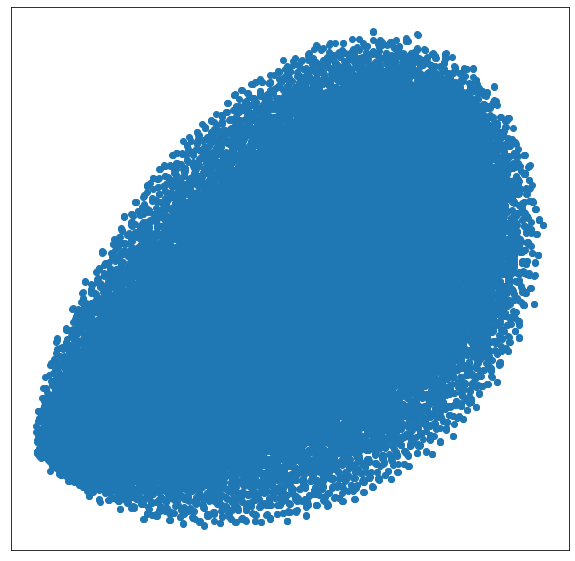

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(item_tsne[:, 0], item_tsne[:, 1]);
plt.xticks(()); plt.yticks(());
plt.show()

In [319]:
model.save('merged_2_embedding_all_features_50f.h5')
item_embeddings.shape

(62990, 50)

In [320]:
user_embeddings.shape

(192403, 50)

In [321]:
pd.DataFrame(user_embeddings).to_pickle("../data/user_embeddings_all_features_50f.pkl")
pd.DataFrame(item_embeddings).to_pickle("../data/product_embeddings_all_features_50f.pkl")

In [322]:
#merge in index
products_clean['idx'] = products_clean.asin.apply(lambda x: prod2idx_df.loc[x])

In [425]:
user_df.head()

,userIdx,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
1,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
2,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
3,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
4,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237


In [330]:
products_clean.set_index('idx', inplace=True)

KeyError: "None of ['idx'] are in the columns"

In [325]:
products_clean.to_pickle("../data/products_clean_idx_all.pkl")

In [326]:
merged_2.head()

,reviewerID,asin,overall,unixReviewTime,help_ratio,help_count,price_t,numberQuestions,numberReviews,meanStarRating,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,AO94DHGC771SJ,0528881469,5.0,0.924624,0.0,0.000000,0.299993,0.000000,0.000000,0.350000,...,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237,0,0
1,AO94DHGC771SJ,B0013G8PTS,5.0,0.916289,0.0,0.000000,0.027950,0.333333,0.090631,0.878889,...,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237,0,1
2,AO94DHGC771SJ,B001TQSFXS,5.0,0.936764,0.0,0.000000,0.016320,0.000000,0.000204,0.625000,...,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237,0,2
3,AO94DHGC771SJ,B003ZBZ64Q,5.0,0.916289,0.0,0.000000,0.037950,0.333333,0.141344,0.910944,...,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237,0,3
4,AO94DHGC771SJ,B0075SUHKI,5.0,0.936764,1.0,0.000032,0.125001,0.333333,0.036456,0.807065,...,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237,0,4


In [576]:
merged_2.reviewerID.value_counts().nlargest(100).nsmallest(5)

ATS2855497V0I     133
A28UMA3GW9L124    133
A1RPTVW5VEOSI     134
ABIVKBMSIPEDY     134
A1NGFGBX2VCQS8    135
Name: reviewerID, dtype: int64

In [616]:
r_id = 'A1NGFGBX2VCQS8' # 'ATS2855497V0I' #A3GW8P7ZZNHM3F
#pick a reviewer
u_test_idx = user2idx_df.loc[r_id]
u_test_idx

idx    25781
Name: A1NGFGBX2VCQS8, dtype: int64

In [617]:
test = products_clean[~products_clean.asin.isin(merged_2[merged_2['reviewerID']==r_id].asin)].index

In [618]:
#setup test dataframe
test = pd.DataFrame(test)
test.rename(columns={"idx":'prodIdx'}, inplace=True)
test['userIdx'] = u_test_idx.idx

In [619]:
#setup product DF for predictions
prod_avg = prod_df[['prodIdx','unixReviewTime','help_ratio','help_count']].groupby(by='prodIdx').mean()
prod_unq = prod_df.iloc[:,[0]+list(range(4,13))].drop_duplicates()
prod_test_pop = pd.merge(prod_avg, prod_unq, how='inner', on='prodIdx')
prod_test_user = pd.merge(test.prodIdx, prod_test_pop, how='inner', on='prodIdx')

#setup user DF for predictions
u=user_df[user_df.userIdx==u_test_idx.idx].drop_duplicates()
user_test_user = pd.concat([u]*prod_test_user.shape[0], ignore_index=True)
[prod_test_user.shape,
user_test_user.shape]

[(62855, 13), (62855, 19)]

In [620]:
#test
u

,userIdx,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
336013,25781,1.0,0.0,0.306792,0.738889,0.75,0.28641,0.699007,0.0,0.106737,0.026593,0.317625,0.064671,0.068181,0.155101,0.0,0.02099,0.003137,0.558527


In [568]:
model_ids_only = keras.models.load_model('merged_2_embedding_ids_only.h5')

In [630]:
#predict ratings
test_predictions = model_ids_only.predict([user_test_user.userIdx.astype(float).values, 
                                  prod_test_user.prodIdx.astype(float).values])

In [634]:
#predict ratings
test_predictions = model.predict([user_test_user.astype(float).values, prod_test_user.astype(float).values])

In [635]:
test['p_ratings'] = test_predictions

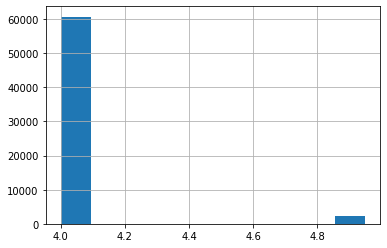

In [636]:
test.p_ratings.round(2).hist()

In [637]:
#find highest predicted ratings
test.sort_values(by='p_ratings', ascending=False).head(10)

,prodIdx,userIdx,p_ratings
9645,29919,25781,4.953890
12662,35734,25781,4.953811
34527,28639,25781,4.953444
36995,38072,25781,4.953330
53514,19998,25781,4.953251
3361,9684,25781,4.953207
31548,60419,25781,4.953204
18438,25658,25781,4.953172
59018,24671,25781,4.953151
32983,50255,25781,4.953148


In [448]:
#find highest predicted ratings
test.sort_values(by='p_ratings', ascending=False).head(10)

,prodIdx,userIdx,p_ratings
9649,29919,80159,4.954152
12666,35734,80159,4.954073
34537,28639,80159,4.953706
37007,38072,80159,4.953592
53566,19998,80159,4.953513
3362,9684,80159,4.953469
31557,60419,80159,4.953467
18440,25658,80159,4.953434
59087,24671,80159,4.953413
32993,50255,80159,4.953410


In [453]:
#top predicted products by rating
pd.merge(products_clean, test.sort_values(
            by='p_ratings', ascending=False).head(10)[['prodIdx','p_ratings']], 
                 how='inner', left_on='idx', right_on='prodIdx')

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,...,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin,prodIdx
0,B0000E68U2,"Built specifically for the E-1 SLR, the FL-50 ...",Olympus FL-50 Electronic Flash for Olympus Dig...,Camera & Photo,Flashes,Shoe Mount Flashes,Unknown,Unknown,1,96.01,...,0,12.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,9684
1,B000HVHDJ8,The ICUSB232PRO 1 ft. USB to RS232 Serial DB9 ...,StarTech.com 1-Feet USB to RS232 Serial DB9 Ad...,Computers & Accessories,Computer Components,I/O Port Cards,Serial Port Cards,Unknown,1,20.87,...,0,18.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,29919
2,B000SDPMEI,Great pictures used to require complicated and...,Nikon D40 6.1MP Digital SLR Camera with 18-55m...,Camera & Photo,Digital Cameras,Digital SLR Cameras,Unknown,Unknown,1,596.95,...,0,13.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,35734
3,B001G5ZTQS,The WP-DC28 Underwater Case has been specifica...,Canon WP-DC28 Waterproof Case for Canon PowerS...,Camera & Photo,Underwater Photography,Housings,Unknown,Unknown,1,22.89,...,0,10.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,25658
4,B003VANRAQ,"For the first time, there is a smart family of...",Intel Core i5-760 Processor 2.8 GHz 8 MB Cache...,Computers & Accessories,Computer Components,CPU Processors,Unknown,Unknown,1,219.99,...,0,12.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,60419
5,B0041SN3E2,Moshi iVisor XT Screen Protection for iPad - C...,Moshi iVisor XT Screen Protection for iPad (Cl...,Computers & Accessories,Touch Screen Tablet Accessories,Screen Protectors,Unknown,Unknown,1,29.95,...,0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,50255
6,B004AB3GJM,TFX0250D5W) 250W Power supply TFX0250D5W For D...,Genuine TFX0250D5W 250W Bestec Power supply Fo...,Computers & Accessories,Computer Components,Power Supplies,Unknown,Unknown,1,34.95,...,0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,28639
7,B004MKNJ6Q,"The best Manfrotto pro ball head, dedicated to...",Manfrotto MH054M0-Q5 054 Magnesium Ball Head w...,Camera & Photo,Tripods & Monopods,Tripod Heads,Unknown,Unknown,1,229.88,...,9,8.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,38072
8,B009DNMXJG,"JBL, TOYOTA: 86160-AC180, 86160AC180, 86160 AC...",Toyota JBL Speaker Foam Edge Repair Replacemen...,Accessories & Supplies,Audio & Video Accessories,Speaker Repair,Speaker Surround Kits,Unknown,1,23.00,...,0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,19998
9,B00D13065M,IVSO Slim-Book Stand Cover Case for Acer Iconi...,IVSO Acer Iconia A1-810 7.9-Inch Slim-BOOK PU ...,eBook Readers & Accessories,Stands,Unknown,Unknown,Unknown,1,12.95,...,0,20.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,24671


In [454]:
pd.merge(products_clean, merged_2.loc[merged_2.reviewerID == 'A1NQFT941TOTT7',], how='inner', on='asin')

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t_x,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,B0007XJSQC,,Sennheiser HD201 Lightweight Over-Ear Binaural...,Accessories & Supplies,Audio & Video Accessories,Headphones,Unknown,Unknown,1,24.95,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,1749
1,B000HPX4AQ,The Belkin Concealed Surge Protector offers an...,Belkin Concealed Surge Protector (Discontinued...,Computers & Accessories,Cables & Accessories,Surge Protectors,Unknown,Unknown,1,29.95,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,6389
2,B000I5JHB0,The Antec Nine Hundred Steel ATX Ultimate Game...,Antec Nine Hundred Black Steel ATX Mid Tower C...,Computers & Accessories,Computer Components,Computer Cases,Unknown,Unknown,1,110.39,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,31128
3,B000IF4788,"2.0 Speaker System - 2.5W per Speaker, 5W, 10W",Logitech X-140 2.0 Speakers,Computers & Accessories,Cables & Accessories,Computer Speakers,Unknown,Unknown,1,28.59,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,2199
4,B000QUUFRW,The SanDisk Extreme SDHC Memory Card offers ou...,SanDisk 4GB Extreme SDHC Class 10 Memory Card,Computers & Accessories,Cables & Accessories,Memory Cards,SD & SDHC Cards,Unknown,1,16.49,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,78
5,B000TG4BA0,Overview:Enjoy wireless freedom with the Micro...,Microsoft Bluetooth Notebook Mouse 5000,Computers & Accessories,Unknown,Unknown,Unknown,Unknown,1,99.95,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,4119
6,B000UY3NR8,Step up to business-class mobility with Blueto...,Logitech V470 Bluetooth Cordless Laser Mouse (...,Computers & Accessories,Cables & Accessories,Mice,Unknown,Unknown,1,76.99,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,4357
7,B000WF8JNI,Form and functionality collide with style in t...,Vantec Thermal Technologies 53088 Hard Drive E...,Computers & Accessories,Cables & Accessories,Hard Drive Enclosures,Unknown,Unknown,1,24.15,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,9747
8,B00129CDGC,PRODUCT FEATURES** Case and hard drives not in...,Cooler Master 4 in 3 HDD Module Device - (STB-...,Computers & Accessories,Unknown,Unknown,Unknown,Unknown,1,30.00,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,9318
9,B0015EDVVU,"Home Entertainment cord and cable covers, grea...",Legrand CMK50 Cord Mate II Kit,Accessories & Supplies,Cord Management,Unknown,Unknown,Unknown,1,23.49,...,0.100772,0.007427,0.00998,0.051504,0.0,0.017926,0.0,0.183733,80159,26534


In [514]:
def get_sim_products_by_user(rev_id):
    #look up reviewer index number
    u_test_idx = user2idx_df.loc[rev_id]
    
    #get all of the products this reviewer has not reviewed
    #test = products_clean[~products_clean.asin.isin(merged_2[merged_2['reviewerID']==rev_id].asin)].idx
    test = products_clean[~products_clean.asin.isin(merged_2[merged_2['reviewerID']==rev_id].asin)].index
    
    #setup test dataframe
    test = pd.DataFrame(test)
    test.rename(columns={"idx":'prodIdx'}, inplace=True)
    test['userIdx'] = u_test_idx.idx
    
    #setup product DF for predictions
    prod_avg = prod_df[['prodIdx','unixReviewTime','help_ratio','help_count']].groupby(by='prodIdx').mean()
    prod_unq = prod_df.iloc[:,[0]+list(range(4,13))].drop_duplicates()
    prod_test_pop = pd.merge(prod_avg, prod_unq, how='inner', on='prodIdx')
    prod_test_user = pd.merge(test.prodIdx, prod_test_pop, how='inner', on='prodIdx')

    #setup user DF for predictions
    u=user_df[user_df.userIdx==u_test_idx.idx].drop_duplicates()
    user_test_user = pd.concat([u]*prod_test_user.shape[0], ignore_index=True)
    [prod_test_user.shape,
    user_test_user.shape]

    #predict ratings
    #test_predictions = model.predict([test.user_idx.astype(float).values, test.prod_idx.astype(float).values])
    test_predictions = model.predict([user_test_user.astype(float).values, prod_test_user.astype(float).values])
    
    test['p_ratings'] = test_predictions
    
    #top predicted products by rating
    y = pd.merge(products_clean, test.sort_values(
            by='p_ratings', ascending=False).head(10)[['prodIdx','p_ratings']], 
                 how='inner', left_on='idx', right_on='prodIdx')
    
    #products reviewed by reviewer
    x = pd.merge(products_clean.iloc[:,:9], 
             merged_2.loc[merged_2.reviewerID == rev_id,], 
             how='inner', on='asin')
                 
    return x, y

In [526]:
merged_2.reviewerID.value_counts().nlargest(100000).nsmallest(1)

A2GHXZGYR9MMUC    6
Name: reviewerID, dtype: int64

In [527]:
x, y = get_sim_products_by_user('A2GHXZGYR9MMUC')

In [518]:
x

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,reviewerID,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,B000BO3CW8,Canon Camera & Camcorder Compatibility\n\n ...,STK's Canon NB-2LH Battery - 1800 mAH for Cano...,Camera & Photo,Accessories,Batteries & Chargers,Batteries,Camera Batteries,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,32110
1,B00178PKVS,In the fast-paced world of Digital Photography...,Sandisk 4GB Ultra II Compactflash Memory Card ...,Computers & Accessories,Cables & Accessories,Memory Cards,CompactFlash Cards,Unknown,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,35904
2,B003NR57BY,EnlargeLogitech Wireless Mouse M510A full-size...,Logitech M510 Wireless Mouse,Computers & Accessories,Cables & Accessories,Mice,Unknown,Unknown,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,1861
3,B005DKZTMG,,Logitech Wireless Touch Keyboard K400 with Bui...,Computers & Accessories,Cables & Accessories,Keyboards,Unknown,Unknown,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,473
4,B00989QKA8,The iSmooth Apple iPad 5 Screen Protector Kit ...,iSmooth Apple iPad Air (Apple iPad 5) Ultra Cl...,Computers & Accessories,Touch Screen Tablet Accessories,Screen Protectors,Unknown,Unknown,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,1734
5,B00EOE4G4E,,Belkin QODE Ultimate Wireless Keyboard and Cas...,Computers & Accessories,Touch Screen Tablet Accessories,Cases & Sleeves,Cases,Unknown,1,A2GHXZGYR9MMUC,...,0.006496,0.0,0.000032,0.245331,0.0,0.206629,0.016471,0.244367,89752,4192


In [519]:
y

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,...,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin,prodIdx,p_ratings
0,B0000E68U2,"Built specifically for the E-1 SLR, the FL-50 ...",Olympus FL-50 Electronic Flash for Olympus Dig...,Camera & Photo,Flashes,Shoe Mount Flashes,Unknown,Unknown,1,96.01,...,12.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,9684,4.952679
1,B000HVHDJ8,The ICUSB232PRO 1 ft. USB to RS232 Serial DB9 ...,StarTech.com 1-Feet USB to RS232 Serial DB9 Ad...,Computers & Accessories,Computer Components,I/O Port Cards,Serial Port Cards,Unknown,1,20.87,...,18.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,29919,4.953363
2,B000SDPMEI,Great pictures used to require complicated and...,Nikon D40 6.1MP Digital SLR Camera with 18-55m...,Camera & Photo,Digital Cameras,Digital SLR Cameras,Unknown,Unknown,1,596.95,...,13.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,35734,4.953283
3,B001G5ZTQS,The WP-DC28 Underwater Case has been specifica...,Canon WP-DC28 Waterproof Case for Canon PowerS...,Camera & Photo,Underwater Photography,Housings,Unknown,Unknown,1,22.89,...,10.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,25658,4.952644
4,B003VANRAQ,"For the first time, there is a smart family of...",Intel Core i5-760 Processor 2.8 GHz 8 MB Cache...,Computers & Accessories,Computer Components,CPU Processors,Unknown,Unknown,1,219.99,...,12.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,60419,4.952677
5,B0041SN3E2,Moshi iVisor XT Screen Protection for iPad - C...,Moshi iVisor XT Screen Protection for iPad (Cl...,Computers & Accessories,Touch Screen Tablet Accessories,Screen Protectors,Unknown,Unknown,1,29.95,...,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,50255,4.952620
6,B004AB3GJM,TFX0250D5W) 250W Power supply TFX0250D5W For D...,Genuine TFX0250D5W 250W Bestec Power supply Fo...,Computers & Accessories,Computer Components,Power Supplies,Unknown,Unknown,1,34.95,...,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,28639,4.952916
7,B004MKNJ6Q,"The best Manfrotto pro ball head, dedicated to...",Manfrotto MH054M0-Q5 054 Magnesium Ball Head w...,Camera & Photo,Tripods & Monopods,Tripod Heads,Unknown,Unknown,1,229.88,...,8.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,38072,4.952802
8,B009DNMXJG,"JBL, TOYOTA: 86160-AC180, 86160AC180, 86160 AC...",Toyota JBL Speaker Foam Edge Repair Replacemen...,Accessories & Supplies,Audio & Video Accessories,Speaker Repair,Speaker Surround Kits,Unknown,1,23.00,...,7.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,19998,4.952723
9,B00D13065M,IVSO Slim-Book Stand Cover Case for Acer Iconi...,IVSO Acer Iconia A1-810 7.9-Inch Slim-BOOK PU ...,eBook Readers & Accessories,Stands,Unknown,Unknown,Unknown,1,12.95,...,20.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,24671,4.952623


In [528]:
import random

In [538]:
rev_id = merged_2.reviewerID.value_counts().nlargest(random.randint(0,merged_2.reviewerID.nunique())).nsmallest(1).index[0]
x, y = get_sim_products_by_user(rev_id)
rev_id

'AJJ7SWQDRYJXG'

In [539]:
x

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,reviewerID,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,B002RCQ0SU,Advanced amateur and professional photographer...,Kingston 32 GB 266x Ultimate 2 Compact Flash C...,Computers & Accessories,Cables & Accessories,Memory Cards,CompactFlash Cards,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,40483
1,B002UT42UI,,Eye-Fi Pro X2 8 GB Class 6 SDHC Wireless Flash...,Computers & Accessories,Cables & Accessories,Memory Cards,SD & SDHC Cards,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,6635
2,B004G6002M,"Capture more photos, record more Full HD video...",SanDisk 16GB Mobile MicroSDHC Class 4 Flash Me...,Computers & Accessories,Cables & Accessories,Memory Cards,Micro SD Cards,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,193
3,B008ATNE8I,(Third Party) Design Replacement CANON BG-E11....,Pixel Vertical Battery Grip for Canon EOS 5D M...,Camera & Photo,Accessories,Digital Camera Accessories,Battery Grips,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,37221
4,B008FP3LZ8,NaN,i-Blason Asus Transformer Pad Infinity TF700T ...,Computers & Accessories,Touch Screen Tablet Accessories,Cases & Sleeves,Cases,Unknown,0,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,5425
5,B008MPCSCS,Fosmon premium quality screen protectors offer...,Fosmon Screen Protector Shield for ASUS Transf...,Computers & Accessories,Touch Screen Tablet Accessories,Screen Protectors,Unknown,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,3875
6,B0090XWU8S,,Eye-Fi 16GB Pro X2 SDHC Class 10 Wireless Flas...,Computers & Accessories,Cables & Accessories,Memory Cards,SD & SDHC Cards,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,424
7,B00A34GP52,The apex of telephoto lenses in a compact pack...,Tamron SP 70-200MM F/2.8 DI VC USD Telephoto Z...,Camera & Photo,Lenses,Camera Lenses,Digital Camera Lenses,Unknown,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,32675
8,B00BQ5UO1S,Durable framework with heavy-duty reflective s...,Westcott Rapid Box 26&quot; Octa Softbox,Camera & Photo,Lighting & Studio,Lighting,Lighting Controls & Modifiers,Soft Boxes,1,AJJ7SWQDRYJXG,...,0.016515,0.000195,0.000222,0.0,0.0,0.0,0.0,0.0,169911,38538


In [540]:
y.sort_values(by='p_ratings', ascending=False).head(5)

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,...,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin,prodIdx,p_ratings
1,B000HVHDJ8,The ICUSB232PRO 1 ft. USB to RS232 Serial DB9 ...,StarTech.com 1-Feet USB to RS232 Serial DB9 Ad...,Computers & Accessories,Computer Components,I/O Port Cards,Serial Port Cards,Unknown,1,20.87,...,18.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,29919,4.953540
2,B000SDPMEI,Great pictures used to require complicated and...,Nikon D40 6.1MP Digital SLR Camera with 18-55m...,Camera & Photo,Digital Cameras,Digital SLR Cameras,Unknown,Unknown,1,596.95,...,13.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,35734,4.953462
6,B004AB3GJM,TFX0250D5W) 250W Power supply TFX0250D5W For D...,Genuine TFX0250D5W 250W Bestec Power supply Fo...,Computers & Accessories,Computer Components,Power Supplies,Unknown,Unknown,1,34.95,...,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,28639,4.953094
7,B004MKNJ6Q,"The best Manfrotto pro ball head, dedicated to...",Manfrotto MH054M0-Q5 054 Magnesium Ball Head w...,Camera & Photo,Tripods & Monopods,Tripod Heads,Unknown,Unknown,1,229.88,...,8.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,38072,4.952980
8,B009DNMXJG,"JBL, TOYOTA: 86160-AC180, 86160AC180, 86160 AC...",Toyota JBL Speaker Foam Edge Repair Replacemen...,Accessories & Supplies,Audio & Video Accessories,Speaker Repair,Speaker Surround Kits,Unknown,1,23.00,...,7.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,19998,4.952901


In [537]:
y.sort_values(by='p_ratings', ascending=False).head(5)

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,...,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin,prodIdx,p_ratings
1,B000HVHDJ8,The ICUSB232PRO 1 ft. USB to RS232 Serial DB9 ...,StarTech.com 1-Feet USB to RS232 Serial DB9 Ad...,Computers & Accessories,Computer Components,I/O Port Cards,Serial Port Cards,Unknown,1,20.87,...,18.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,29919,4.953793
2,B000SDPMEI,Great pictures used to require complicated and...,Nikon D40 6.1MP Digital SLR Camera with 18-55m...,Camera & Photo,Digital Cameras,Digital SLR Cameras,Unknown,Unknown,1,596.95,...,13.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,35734,4.953714
6,B004AB3GJM,TFX0250D5W) 250W Power supply TFX0250D5W For D...,Genuine TFX0250D5W 250W Bestec Power supply Fo...,Computers & Accessories,Computer Components,Power Supplies,Unknown,Unknown,1,34.95,...,6.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,28639,4.953347
7,B004MKNJ6Q,"The best Manfrotto pro ball head, dedicated to...",Manfrotto MH054M0-Q5 054 Magnesium Ball Head w...,Camera & Photo,Tripods & Monopods,Tripod Heads,Unknown,Unknown,1,229.88,...,8.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,38072,4.953233
8,B009DNMXJG,"JBL, TOYOTA: 86160-AC180, 86160AC180, 86160 AC...",Toyota JBL Speaker Foam Edge Repair Replacemen...,Accessories & Supplies,Audio & Video Accessories,Speaker Repair,Speaker Surround Kits,Unknown,1,23.00,...,7.0,5.0,0.0,0.0,0.0,0.0,1.0,Unknown,19998,4.953154
